In [1]:
# This tutorial demonstrates VCS streamline support.
# We show randomly seeded and evenly spaced streamlines.
#
import warnings
warnings.filterwarnings('ignore')
import vcs
import cdms2

In [2]:
# Download the sample data if needed
# vcs.download_sample_data_files()
# read clt.nc
f=cdms2.open(vcs.sample_data+"/clt.nc")

In [3]:
# read two variables
u = f("u")
v = f("v")

In [4]:
# initialize vcs
x=vcs.init()

In [5]:
# create the streamline graphics method
gm = x.createstreamline()

In [6]:
# we set parameters for randomly seeded streamlines
gm.evenlyspaced = False         # only available on releases after 2.10 or on the nightly packages.
# streamlines are colored by vector magnitude
gm.coloredbyvector = True
# We want 10 glyphs(arrows) per streamline
gm.numberofglyphs = 10
gm.filledglyph = True
# we place 400 random seeds in a circle that covers the data. This means fewer seeds will be inside the data.
# The number of seeds inside the data will result in streamlines.
gm.numberofseeds = 400

In [7]:
# use the robinson projection for the data.
p = x.createprojection()
p.type = 'robinson'
gm.projection = p

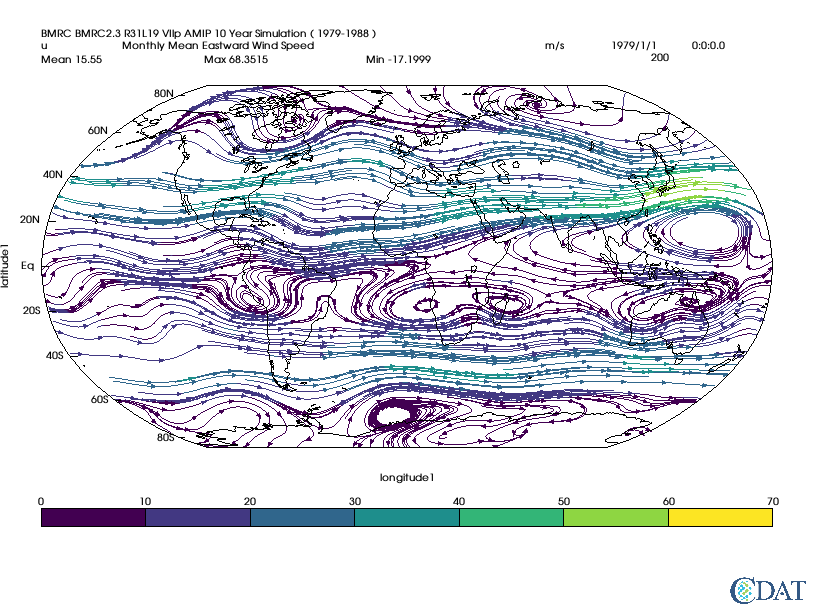

In [8]:
# we plot randomly seeded streamlines
x.plot(u, v, gm, bg=1)

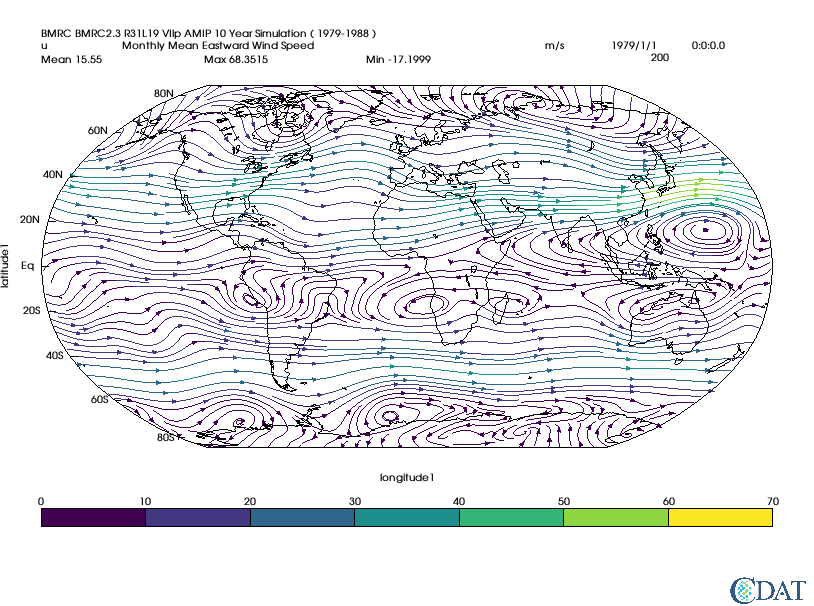

In [9]:
# we plot evenly spaced streamlines
x.clear()
gm.evenlyspaced = True # only available only on releases > 2.10 or on the nightly packages
# We want the streamline to be about one cell apart from each other
gm.separatingdistance = 1
# The seed for the first streamline. All other seeds are generated automatically
gm.startseed = [0, 0, 0]
# create an evenly spaced streamline plot
x.plot(u, v, gm, bg=1)

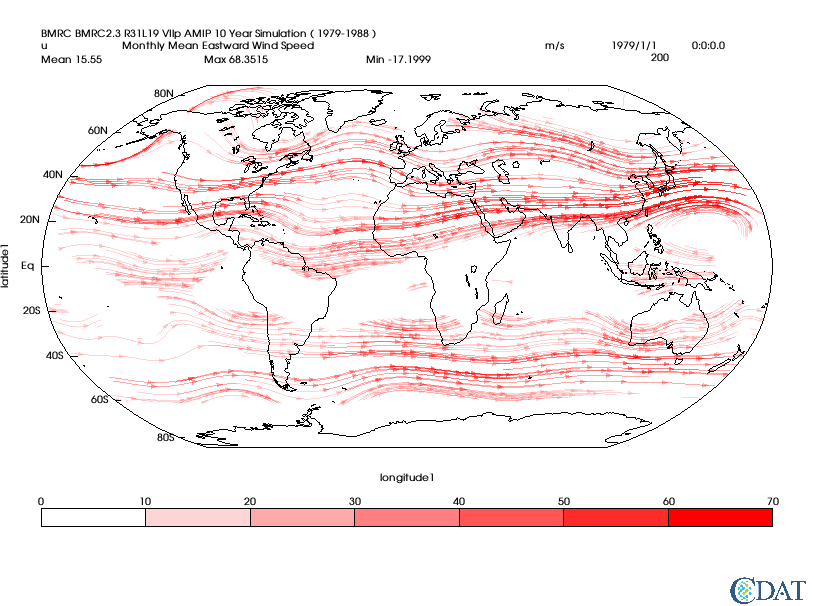

In [10]:
# we plot randomly seeded streamlines with a red color map
x.clear()
#create a red colormap with low values mapped to low opacity
cmap = x.createcolormap()
for i in range(256):
    cmap.setcolorcell(i,100.,0,0,i/2.55)
x.setcolormap(cmap)
gm.evenlyspaced=False    # attribute available only on releases > 2.10 or on the nightly packages
x.plot(u, v, gm, bg=1)